# Time series analysis of historical daily electricity consumption and daily weather data for France

<h3>Activities</h3>
<ol type="1">
    <li> Data collection, loading, and assembling </li>
    <li> Understanding the variables </li>
    <li> Data cleaning
        <ul>
            <li> Checking nan values  </li>
            <li> deleting unencessary rows </li> 
             <li> linear interpolation </li> 
         </ul>
    </li>
    <li> Feature selection </li>
    <li> Build Linear regression model  </li>
    <li> Increase model performance  </li>
    <li> Comparing different approaches of improving the model performance         </li>
    <li>Communicating the insights </li>
</ol>

# Importing libraries

In [1]:
# for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for statistical models
import statsmodels.api as sm

# for model selection and fitting
from sklearn.linear_model import LinearRegression  

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Reading and loading the daily weather dataset

In [2]:
# read the data and load it as a dataframe using unicode_escape encoding that convers non ASCII characters
data =  pd.read_csv("Paris_weather_data_2017.csv",encoding='unicode_escape')
data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,1/5/2017,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,...,987,982,31.0,12.0,6.0,39,24,58,4,Rain
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,...,1005,999,31.0,16.0,10.0,19,13,-,0,NaN
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,...,1006,1000,31.0,12.0,3.0,32,13,47,12,"Rain , Thunderstorm"
363,12/30/2017,14,10,6,12,10,4,100,87,73,...,1006,1000,19.0,9.0,3.0,32,19,55,3,Rain


### Data pre-processing

In [3]:
data.sample(10)   # getting a sample of 10 entries

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
292,10/20/2017,17,13,11,12,9,6,88,72,43,...,1012,1008,31.0,13.0,5.0,29,18,-,5,Rain
153,6/3/2017,21,18,14,16,13,8,94,77,53,...,1015,1014,31.0,14.0,6.0,21,8,32,1,Rain
179,6/29/2017,22,18,14,15,12,9,88,72,38,...,999,997,31.0,13.0,10.0,26,11,-,1,Rain
287,10/15/2017,24,17,10,15,12,9,100,75,42,...,1023,1021,26.0,17.0,0.0,16,5,-,0,Fog
37,2/7/2017,11,7,3,8,3,0,100,79,43,...,1015,1014,26.0,11.0,2.0,27,13,-,1,Rain
162,6/12/2017,22,18,13,13,9,8,82,54,33,...,1020,1017,26.0,14.0,10.0,19,14,-,0,NaN
172,6/22/2017,36,28,20,20,17,15,78,53,21,...,1013,1012,26.0,23.0,18.0,29,10,-,0,NaN
163,6/13/2017,24,18,11,12,9,7,77,54,27,...,1019,1017,31.0,29.0,19.0,19,10,-,0,NaN
29,1/30/2017,11,8,6,10,7,3,100,87,63,...,1013,1012,26.0,9.0,2.0,23,16,-,2,Rain
78,3/20/2017,12,11,9,8,6,4,82,69,49,...,1012,1010,31.0,13.0,10.0,29,14,-,0,NaN


In [4]:
data.info()     # getting more insight on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

In [5]:
# check for nan values
data.isnull().sum()

Date                             0
high Temp. (°C)                  0
avg Temp. (°C)                   0
low Temp. (°C)                   0
high Dew Point (°C)              0
avg Dew Point (°C)               0
low Dew Point (°C)               0
high Humidity (%)                0
avg Humidity (%)                 0
low Humidity (%)                 0
high Sea Level Press. (hPa)      0
avg Sea Level Press. (hPa)       0
low Sea Level Press. (hPa)       0
high Visibility (km)             2
avg Visibility (km)              2
low Visibility (km)              2
high Wind (km/h)                 0
avg Wind (km/h)                  0
high Gust Wind (km/h)            0
sum Precip. (mm)                 0
Events                         139
dtype: int64

In [6]:
# droping high gust and events column because they are not necessary
data = data.drop(columns=['high Gust Wind (km/h)', 'Events'])

In [7]:
data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [8]:
df1 = data.interpolate(method='linear')        # interpolating the missing values using linear method
df1

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [9]:
# check for nan values after linear interpolation
df1.isnull().sum()

Date                           0
high Temp. (°C)                0
avg Temp. (°C)                 0
low Temp. (°C)                 0
high Dew Point (°C)            0
avg Dew Point (°C)             0
low Dew Point (°C)             0
high Humidity (%)              0
avg Humidity (%)               0
low Humidity (%)               0
high Sea Level Press. (hPa)    0
avg Sea Level Press. (hPa)     0
low Sea Level Press. (hPa)     0
high Visibility (km)           0
avg Visibility (km)            0
low Visibility (km)            0
high Wind (km/h)               0
avg Wind (km/h)                0
sum Precip. (mm)               0
dtype: int64

### Finding the correlation matrix between  weather variables to analyze their linear relationship

In [10]:
# getting the cleaned weather dataset
df1  

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


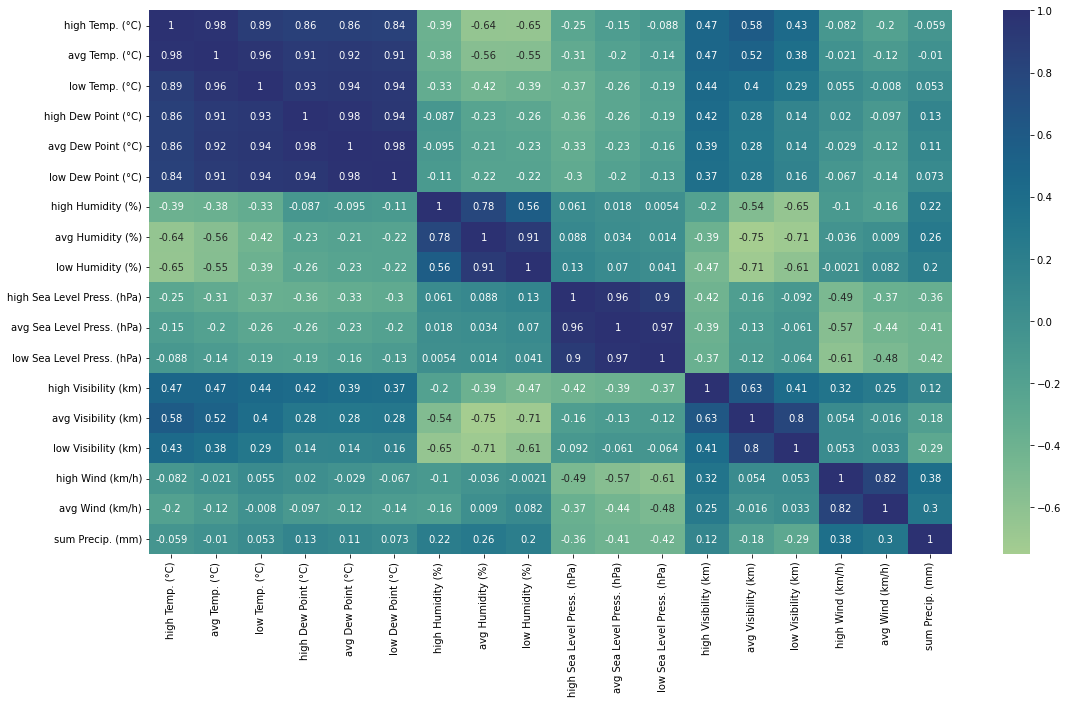

In [11]:
# correlation matrix of the weather variables
corr_m = df1.corr()

# ploting the heatmap for the correlation
plt.figure(figsize=(18,10))          # Adjusting the plot size
sns.heatmap(corr_m,cmap='crest', annot=True)   

plt.show()

<b> Overall observation </b>

<p> Some variables are highly positively correlated and others highly negatively correlated. Among the highly positively correlated variables, there are; avg Temp. (°C) & high Temp. (°C), high Dew Point (°C) & avg Dew Point (°C), low Dew Point (°C)& avg Dew Point (°C) and low Dew Point (°C)&avg Temp. (°C). This means that when one variable increases the other increases too and when it decreases, the other one decreases too. For the negatively correlated, humidity and temperature variables have a negative
correlation, and visibility and humidity variables seem to have a negative correlation too. </p>

### Reading and loading the daily energy consumption dataset

In [12]:
# read the data and load it as a dataframe skipping first 7 unnecessary rows
elect_df = pd.read_csv("Historique_consommation_JOUR_2017.csv",skiprows=[0,1,2,3,4,5,6])
elect_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01/01/2017,Définitives,1652084.0
2,NaN,NaN,NaN,02/01/2017,Définitives,1768332.0
3,NaN,NaN,NaN,03/01/2017,Définitives,1886120.0
4,NaN,NaN,NaN,04/01/2017,Définitives,1923775.0
...,...,...,...,...,...,...
372,NaN,NaN,NaN,27/12/2017,Définitives,1582970.0
373,NaN,NaN,NaN,28/12/2017,Définitives,1664743.0
374,NaN,NaN,NaN,29/12/2017,Définitives,1668623.0
375,NaN,NaN,NaN,30/12/2017,Définitives,1437082.0


### Data pre-processing(cleaning)

In [13]:
# dropping the first 3 unnecessary columns 
elect_df.drop(elect_df.columns[[0, 1, 2]], axis=1, inplace=True)

In [14]:
elect_df

,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


In [15]:
# droping nan values
df2 = elect_df.dropna(axis=0)

In [16]:
# df after dropping and cleaning
df2

,Date,Type de données,Energie journalière (MWh)
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
5,05/01/2017,Définitives,1887470.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


### Merging the two datasets for making a timeseries plot 

In [17]:
# convert date data type and format of the energy consumption data
df2['Date']=pd.to_datetime(df2['Date'],format='%d/%m/%Y')


In [18]:
# convert date data type and format of the weather data 
df1['Date']=pd.to_datetime(df1['Date'],format='%m/%d/%Y')

In [19]:
# merge the two datasets
merged_data = pd.merge(df1,df2)
merged_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Type de données,Energie journalière (MWh)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,0,Définitives,1652084.0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,2,Définitives,1768332.0
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,0,Définitives,1886120.0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,2,Définitives,1923775.0
4,2017-01-05,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,0,Définitives,1887470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,...,987,982,31.0,12.0,6.0,39,24,4,Définitives,1582970.0
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,...,1005,999,31.0,16.0,10.0,19,13,0,Définitives,1664743.0
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,...,1006,1000,31.0,12.0,3.0,32,13,12,Définitives,1668623.0
363,2017-12-30,14,10,6,12,10,4,100,87,73,...,1006,1000,19.0,9.0,3.0,32,19,3,Définitives,1437082.0


### Plotting the energy consumption against the average temperature

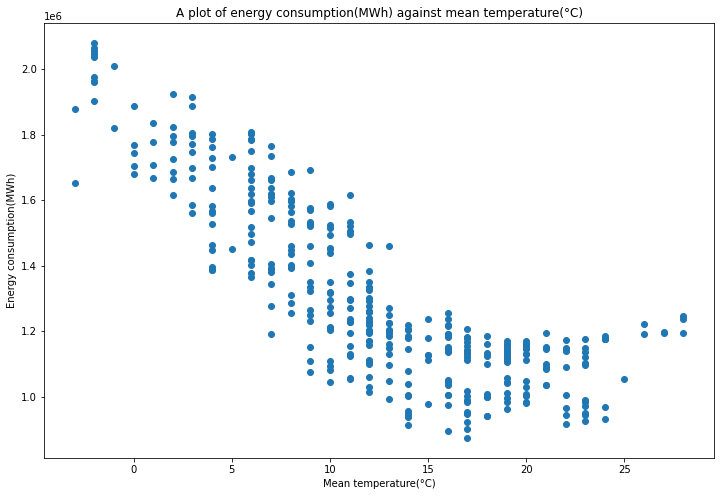

In [20]:
# a scatter plot of energy consumption against mean temperature
plt.figure(figsize=(12,8)) 
plt.scatter(merged_data['avg Temp. (°C)'], merged_data['Energie journalière (MWh)'])

#naming x and y axis and title
plt.xlabel('Mean temperature(°C)')
plt.ylabel('Energy consumption(MWh)')
plt.title('A plot of energy consumption(MWh) against mean temperature(°C)')
plt.show() 


<p> This graph illustrates that as the energy consumption decreases the temperature increases and when the energy consumption is high, the temperature seems to be low. </p>

### Fitting a quadratic model to the energy versus temperature

The fitted polynomial regression equation:
       2
1567 x - 7.141e+04 x + 1.879e+06


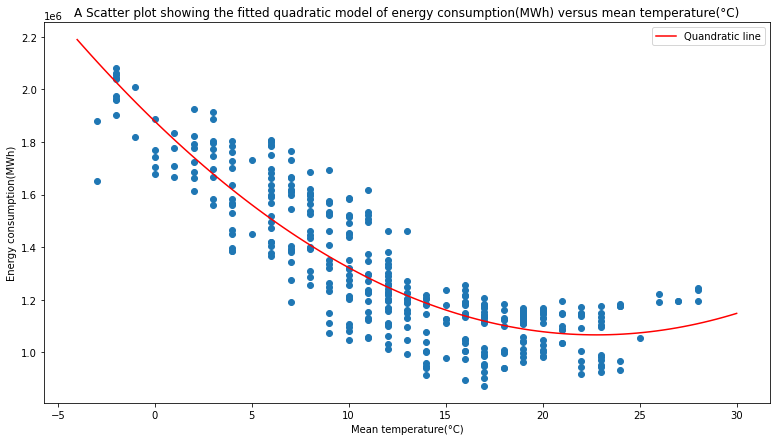

In [21]:
# fitting a quadratic model as a line to the energy versus temperature

# degree 2 polynomial fit 
model = np.poly1d(np.polyfit(merged_data['avg Temp. (°C)'], merged_data['Energie journalière (MWh)'], 2))

# the fitted polynomial regression equation
print("The fitted polynomial regression equation:\n", model)

# plotting the fitted quadratic model as a line to the energy versus temperature scatter plot
plt.figure(figsize=(13,7))        # adjusting the plot size
line = np.linspace(-4, 30, 100)   # the polyline that shows the quadratic fit

# scatter plot of energy versus temperature
plt.scatter(merged_data['avg Temp. (°C)'], merged_data['Energie journalière (MWh)'])   
plt.plot(line, model(line), label='Quandratic line',color='red')  # ploting the line in the scatter plot

# naming x and y axis and title
plt.xlabel('Mean temperature(°C)')
plt.ylabel('Energy consumption(MWh)')
plt.title('A Scatter plot showing the fitted quadratic model of energy consumption(MWh) versus mean temperature(°C)')

plt.legend()
plt.show() 


<p> When the energy consumption increases, temperature decreases and as energy decreases the temperature increases. The fitted quadratic model as a line, its coefficients
were 1567 x^2-- 7.141e+04 x + 1.879e+06, and the fitted line goes along with the observation.</p>


### Finding the optimal minimum temperature that corresponds to the  lowest energy consumption and show it on the graph

The optimal minimum temperature is:  22.777843985488715


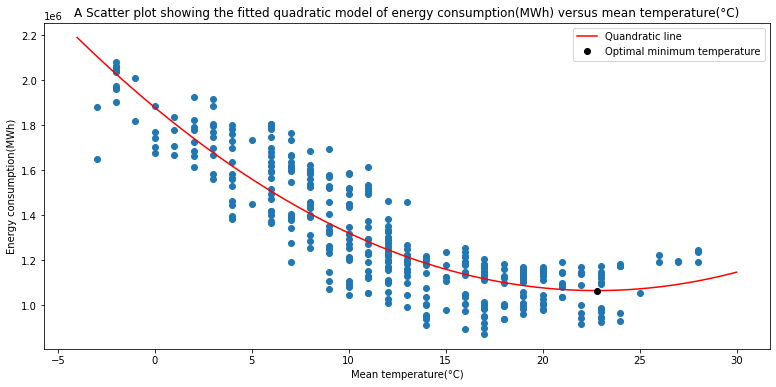

In [22]:
# getting the optimal minimum temperature that corresponds to the lowest energy consumption using the quadratic equation
model1 = np.polyfit(merged_data['avg Temp. (°C)'], merged_data['Energie journalière (MWh)'], 2)

a2 = model1[0]    # first coefficient
a1 = model1[1]    # secondf coefficient
a0 = model1[2]    # third coefficient 

x = -a1/(2*a2)    # minimum value 
y = a2*(x**2) + a1*x + a0  # the quadratic equation 

print("The optimal minimum temperature is: ", x)

# plotting the fitted quadratic model as a line to the energy versus temperature scatter plot
plt.figure(figsize=(13,6))        # adjusting the plot size
line = np.linspace(-4, 30, 100)   # the polyline that shows the quadratic fit

# scatter plot of energy versus temperature showing the optimal minimum temperature
plt.scatter(merged_data['avg Temp. (°C)'], merged_data['Energie journalière (MWh)'])   
plt.plot(line, model(line), label='Quandratic line',color='red')  # ploting the line in the scatter plot

optimal_point = model(x)          # getting the optimal point of x from the model coefficients

# ploting the x on the graph
plt.plot(x,optimal_point, "o",color = "black", label ='Optimal minimum temperature')

# naming x and y axis and title
plt.xlabel('Mean temperature(°C)')
plt.ylabel('Energy consumption(MWh)')
plt.title('A Scatter plot showing the fitted quadratic model of energy consumption(MWh) versus mean temperature(°C)')

plt.legend()
plt.show() 



<p> The optimal minimum temperature on the fitted quadratic line and a
black dot that shows the optimal minimum temperature of 22(°C) that corresponds to the lowest energy consumption. This means that the lowest energy consumption is between 1.0 and 2.2(MWh). </p>

### Doing a stepwise approach  to find an optimal multivariate linear regression model using the weather variables.

<p> 
A stepwise approach using forward selection was used for feature selection to avoid overfitting by removing unnecessary features for prediction. The forward selection will start with an empty set of variables, then add one variable at a time until a certain criterion is met based on the most significant using the statistical significance. It will select features based on the feature that has the best p-value less than the 0.05 threshold. The selected features will further be used for fitting a linear regression model.

    
</p> 

In [23]:
# using stepwise selection (forward regression) to find an optimal multivariate linear regression model

# forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
 
# defining dependent variabe and independent variables
x = merged_data.iloc[:,1:-2]   # independent variables 
y = merged_data['Energie journalière (MWh)'] # dependent variable


selected_features=[]     # a list that keeps all the selected features

# defining forward selection function that will select best significant features for prediction
def forward_regression(X, y, verbose=False):
                       
    top_variable = []               # keeps the most significant variables
    
    while True:
        changed=False
        least_significant = list(set(X.columns)-set(top_variable))      # the least significant variables
        new_pvalue = pd.Series(index=least_significant)
        for values in least_significant:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[top_variable+[values]]))).fit() 
            new_pvalue[values] = model.pvalues[values]
        best_pvalue = new_pvalue.min()
        if best_pvalue < 0.05:                 # the best pvalue is the pvalue with less than 0.05 threshold
            best_variable = new_pvalue.idxmin()
            top_variable.append(best_variable)
            changed=True
            if True:
                print('Add {:20} with p-value {:.6}'.format(best_variable, best_pvalue))
                selected_features.append(best_variable) # storing the added feature

        if not changed:
            break
#     print(model.summary())

forward_regression(x,y,verbose=True)


Add high Temp. (°C)      with p-value 1.82151e-93
Add high Visibility (km) with p-value 9.72513e-08
Add high Humidity (%)    with p-value 0.000846698
Add avg Temp. (°C)       with p-value 0.014433
Add low Humidity (%)     with p-value 7.79481e-06
Add avg Dew Point (°C)   with p-value 0.00204418
Add low Sea Level Press. (hPa) with p-value 0.00718581


Forward feature selection selected 7 variables that are most relevant in preditions

### Using the selected features by forward selection to find an optimal multivariate linear regression model 

In [24]:
# getting selected features from the whole dsastaset
x = merged_data[selected_features]        # independent variables
y = merged_data['Energie journalière (MWh)']   # dependent variable

# building a linear regression model

# adding a constant 
x = sm.add_constant(x)

# fiting the model
model1 = sm.OLS(y,x).fit()

print(model1.summary())


                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.751
Model:                                   OLS   Adj. R-squared:                  0.746
Method:                        Least Squares   F-statistic:                     153.5
Date:                       Sat, 28 Jan 2023   Prob (F-statistic):          1.38e-103
Time:                               22:52:21   Log-Likelihood:                -4840.2
No. Observations:                        365   AIC:                             9696.
Df Residuals:                            357   BIC:                             9728.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [25]:
# analyzing the accuracy of the model using coefficient of determination(R2)
print('The coefficient of determination R2 :', model1.rsquared)

The coefficient of determination R2 : 0.7506437341112866


<p> The fitted linear regression model’s coefficient of determination (r squared) was 0.75%. This means that 75% of the predictors(weather variables) explain about 75% of the variation in our response variable(energy consumption). </p>

### Increasing the model performance by increasing the number of explanatory variables by also considering squared terms for each weather variable.

In [26]:
# getting the combined energy consumption and weather dataset 
df = merged_data.iloc[:,1:-2]   # extracting only the weather variables from the dataset
df

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [27]:
# getting the square of each weather variable
new_df = df**2
new_df

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,0,9,25,1,9,36,10000,8836,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,4,0,4,1,1,1,10000,9025,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,1,0,1,1,0,1,10000,9025,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,36,4,1,16,1,1,10000,7569,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,49,9,1,4,0,4,8649,6241,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,36,16,9,25,4,4,8649,6724,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,36,4,1,1,1,9,8649,6400,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,64,9,1,36,4,1,10000,7225,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,196,100,36,144,100,16,10000,7569,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


In [28]:
# changing the header names for the new squared df of the weather variables by adding root suffix
new_df = new_df.add_suffix(' root')   
new_df

,high Temp. (°C) root,avg Temp. (°C) root,low Temp. (°C) root,high Dew Point (°C) root,avg Dew Point (°C) root,low Dew Point (°C) root,high Humidity (%) root,avg Humidity (%) root,low Humidity (%) root,high Sea Level Press. (hPa) root,avg Sea Level Press. (hPa) root,low Sea Level Press. (hPa) root,high Visibility (km) root,avg Visibility (km) root,low Visibility (km) root,high Wind (km/h) root,avg Wind (km/h) root,sum Precip. (mm) root
0,0,9,25,1,9,36,10000,8836,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,4,0,4,1,1,1,10000,9025,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,1,0,1,1,0,1,10000,9025,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,36,4,1,16,1,1,10000,7569,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,49,9,1,4,0,4,8649,6241,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,36,16,9,25,4,4,8649,6724,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,36,4,1,1,1,9,8649,6400,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,64,9,1,36,4,1,10000,7225,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,196,100,36,144,100,16,10000,7569,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


In [29]:
# concatinating the two datsets ( the one with all weather variables and the dataframe with their squared terms-- X and X2)
merged_df = pd.concat([df,new_df],axis=1)
merged_df

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Humidity (%) root,high Sea Level Press. (hPa) root,avg Sea Level Press. (hPa) root,low Sea Level Press. (hPa) root,high Visibility (km) root,avg Visibility (km) root,low Visibility (km) root,high Wind (km/h) root,avg Wind (km/h) root,sum Precip. (mm) root
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,2,0,-2,1,1,-1,100,95,88,1030,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,1,0,-1,1,0,-1,100,95,88,1032,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,6,2,-1,4,1,-1,100,87,71,1028,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,7,3,1,2,0,-2,93,79,59,1038,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,6,2,-1,1,-1,-3,93,80,57,1011,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,8,3,-1,6,2,-1,100,85,54,1012,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,14,10,6,12,10,4,100,87,73,1011,...,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


In [30]:
# performing stepwise approach to get new variables after combining weather variables dataset with its squared terms

# defining dependent variabe and independent variables
x = merged_df  # independent variables 
y = merged_data['Energie journalière (MWh)'] # dependent variable

# passing in the forward selection function the new values of x and y
forward_regression(x,y,verbose=True)

Add high Temp. (°C)      with p-value 1.82151e-93
Add high Temp. (°C) root with p-value 1.18332e-36
Add high Visibility (km) root with p-value 0.0300572
Add high Visibility (km) with p-value 0.00131632


Forward feature selection this time selected 4 variables out of 36 as best most significant variables for prediction and out 4, the two selected were from the new dataset added on.

### Performing linear regression model for the new selected features

In [31]:
# getting selected features from the merged dataset(X,X2)
x = merged_df[selected_features]     # explanatory variables
y = merged_data['Energie journalière (MWh)']   # response variable

# building a linear regression model

# adding a constant 
x = sm.add_constant(x)

# fiting the model
model2 = sm.OLS(y,x).fit()

print(model2.summary()) 

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.819
Model:                                   OLS   Adj. R-squared:                  0.814
Method:                        Least Squares   F-statistic:                     178.6
Date:                       Sat, 28 Jan 2023   Prob (F-statistic):          5.43e-126
Time:                               22:52:30   Log-Likelihood:                -4781.6
No. Observations:                        365   AIC:                             9583.
Df Residuals:                            355   BIC:                             9622.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [32]:
# the coefficient of determination for model2 
print('The R2 for model2 :', model2.rsquared)

The R2 for model2 : 0.8190636512601229


<p> The coefficient of determination for the new model became 0.8190636512601229. This means that almost 82% of the predictors(weather variables) explain about 82% of the variation in our response variable(energy consumption). </p>

### Increasing the performance of the model  by increasing the number of explanatory variables again but this time by including dummy variables of the days of the week taking the dates column on the dataset

In [33]:
# the merged dataset of temperature and energy datasets
merged_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Type de données,Energie journalière (MWh)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,0,Définitives,1652084.0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,2,Définitives,1768332.0
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,0,Définitives,1886120.0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,2,Définitives,1923775.0
4,2017-01-05,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,0,Définitives,1887470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,...,987,982,31.0,12.0,6.0,39,24,4,Définitives,1582970.0
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,...,1005,999,31.0,16.0,10.0,19,13,0,Définitives,1664743.0
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,...,1006,1000,31.0,12.0,3.0,32,13,12,Définitives,1668623.0
363,2017-12-30,14,10,6,12,10,4,100,87,73,...,1006,1000,19.0,9.0,3.0,32,19,3,Définitives,1437082.0


In [34]:
# getting the day names of the dates
dates = merged_data[['Date']] # extracting the date column from the merged dataset

dates['days'] = dates['Date'].dt.day_name()   # creating a new column that gets the day names of the corresponding dates
dates

,Date,days
0,2017-01-01,Sunday
1,2017-01-02,Monday
2,2017-01-03,Tuesday
3,2017-01-04,Wednesday
4,2017-01-05,Thursday
...,...,...
360,2017-12-27,Wednesday
361,2017-12-28,Thursday
362,2017-12-29,Friday
363,2017-12-30,Saturday


In [35]:
# getting dummy variables for the day of the week
dummy_var = pd.get_dummies(dates)
dummy_var

,Date,days_Friday,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday
0,2017-01-01,0,0,0,1,0,0,0
1,2017-01-02,0,1,0,0,0,0,0
2,2017-01-03,0,0,0,0,0,1,0
3,2017-01-04,0,0,0,0,0,0,1
4,2017-01-05,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
360,2017-12-27,0,0,0,0,0,0,1
361,2017-12-28,0,0,0,0,1,0,0
362,2017-12-29,1,0,0,0,0,0,0
363,2017-12-30,0,0,1,0,0,0,0


### Merging the dummy variables dataset with the previous dataset used building the previous model

In [36]:
# merging X, X2 and dummy variables
concat_df = pd.concat([dummy_var,merged_df],axis=1)
concat_df

,Date,days_Friday,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday,high Temp. (°C),avg Temp. (°C),...,low Humidity (%) root,high Sea Level Press. (hPa) root,avg Sea Level Press. (hPa) root,low Sea Level Press. (hPa) root,high Visibility (km) root,avg Visibility (km) root,low Visibility (km) root,high Wind (km/h) root,avg Wind (km/h) root,sum Precip. (mm) root
0,2017-01-01,0,0,0,1,0,0,0,0,-3,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,2017-01-02,0,1,0,0,0,0,0,2,0,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,2017-01-03,0,0,0,0,0,1,0,1,0,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,2017-01-04,0,0,0,0,0,0,1,6,2,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,2017-01-05,0,0,0,0,1,0,0,7,3,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,0,0,0,0,0,0,1,6,4,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,2017-12-28,0,0,0,0,1,0,0,6,2,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,2017-12-29,1,0,0,0,0,0,0,8,3,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,2017-12-30,0,0,1,0,0,0,0,14,10,...,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


### Performing feature selection for the new dataset and building linear regression model to compare the accuracy of a big datset with the previous models built on small datasets

In [37]:
# performing stepwise approach to get new variables for the model after combining X,X2 and Dummy variables

# defining dependent variabe and independent variables
x = concat_df.iloc[:,1:]  # independent variables 
y = merged_data['Energie journalière (MWh)'] # dependent variable

# passing in the forward selection function the new values of x and y
forward_regression(x,y,verbose=True)

Add high Temp. (°C)      with p-value 1.82151e-93
Add high Temp. (°C) root with p-value 1.18332e-36
Add days_Sunday          with p-value 2.02543e-18
Add days_Saturday        with p-value 1.51634e-18
Add avg Temp. (°C)       with p-value 2.22261e-05
Add low Humidity (%)     with p-value 2.29513e-06
Add high Wind (km/h) root with p-value 0.000399405
Add days_Monday          with p-value 0.00398247
Add sum Precip. (mm)     with p-value 0.0117157
Add avg Temp. (°C) root  with p-value 0.026503
Add high Dew Point (°C) root with p-value 0.016792


Forward feature selection this time selected 11 variables out of 44 as best most significant variables for prediction

### Linear regression model

In [38]:
# getting selected features from the merged dataset(X,X2 and dummy variables)
x = concat_df[selected_features]   # independent variables
y = merged_data['Energie journalière (MWh)']   # dependent variable

# building a linear regression model

# adding a constant 
x = sm.add_constant(x)

# fiting the model
model3 = sm.OLS(y,x).fit()

print(model2.summary())

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.819
Model:                                   OLS   Adj. R-squared:                  0.814
Method:                        Least Squares   F-statistic:                     178.6
Date:                       Sat, 28 Jan 2023   Prob (F-statistic):          5.43e-126
Time:                               22:53:00   Log-Likelihood:                -4781.6
No. Observations:                        365   AIC:                             9583.
Df Residuals:                            355   BIC:                             9622.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [39]:
# the coefficient of determination (R2) for model3 
print('The R2 for model3 :', model3.rsquared)

The R2 for model3 : 0.8990864536525682


After increasing the numbers of explanatory variables at the second time, the accuracy of the model increased from 82% to almost 90%. This means that as the dataset becomes large or as you have many variables to train on the model, the more accurate the results will be.  